About data
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

A/B Testing Evaluation Summary

Objective:
Evaluate the effectiveness of three marketing promotions on weekly sales performance and identify if any statistically significant differences exist among them.

Methodology:

Conducted a one-way ANOVA test on the average weekly sales per location across three promotion groups.

Each group represents a different marketing strategy.

Normalized by averaging sales over 4 weeks for each location to control for repeated measures.

Results:

ANOVA F-statistic: 5.846

p-value: 0.0037

Interpretation:

Since the p-value is < 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in average sales among the three promotions.

Conclusion:

At least one promotion strategy leads to significantly different sales performance.

Further post-hoc analysis is recommended to determine which specific promotion(s) are driving the difference.

Based on the group averages, the promotion with the highest average sales is the most effective marketing strategy.

In [10]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/Users/zacw/Documents/Data Science/A:B Testing & Experimentation/WA_Marketing-Campaign.csv')

In [5]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [6]:
df.groupby("Promotion").agg({"SalesInThousands": ["mean", "count", "sum"]})

SalesInThousands                
                      mean count       sum
Promotion                                 
1                58.099012   172   9993.03
2                47.329415   188   8897.93
3                55.364468   188  10408.52

In [7]:
# Analyze Sales on different Promotion and Marketsize
df.groupby(["MarketSize","Promotion"]).agg({"SalesInThousands":["count", "mean", "sum"]})

SalesInThousands                    
                                count       mean      sum
MarketSize Promotion                                     
Large      1                       56  75.235893  4213.21
           2                       64  60.322031  3860.61
           3                       48  77.203958  3705.79
Medium     1                       96  47.672604  4576.57
           2                      108  39.114352  4224.35
           3                      116  45.468879  5274.39
Small      1                       20  60.162500  1203.25
           2                       16  50.810625   812.97
           3                       24  59.514167  1428.34

/Users/zacw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zacw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


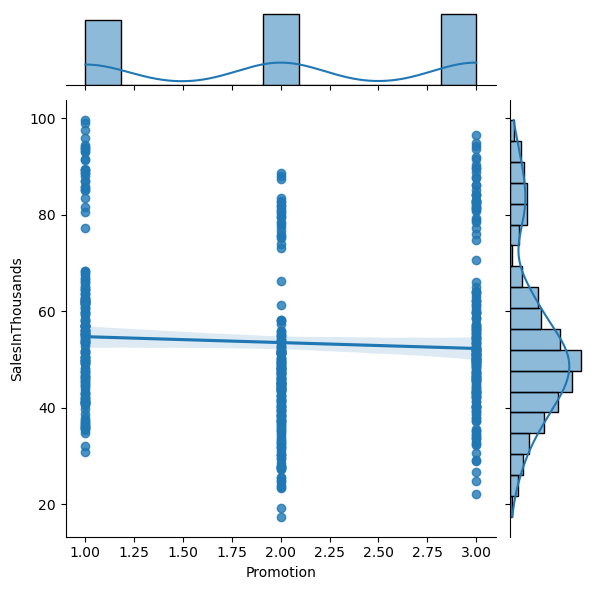

In [8]:
# Let's see some graphs
sns.jointplot(x = "Promotion", y = "SalesInThousands", data = df, kind = "reg")

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')


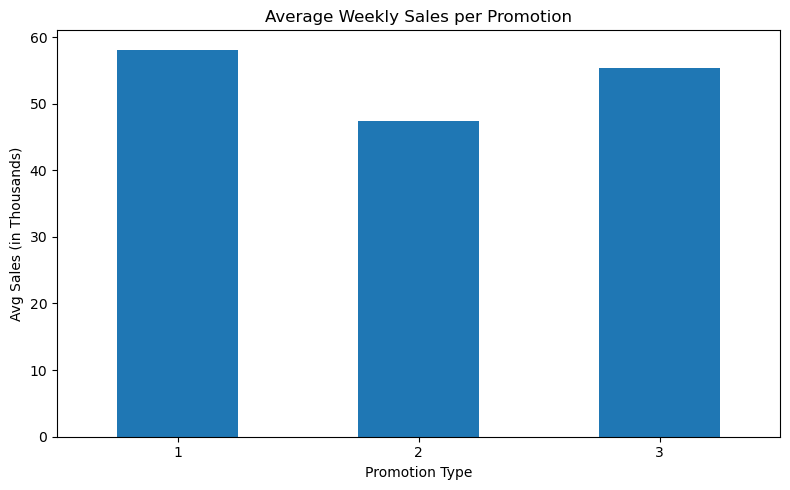

ANOVA F-statistic: 5.846
p-value: 0.0037
✅ Statistically significant differences exist among promotions.


In [11]:
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Calculate average weekly sales per LocationID (to normalize repeated measures)
location_sales = df.groupby(['Promotion', 'LocationID'])['SalesInThousands'].mean().reset_index()

# Step 2: Prepare data for ANOVA
promo_groups = location_sales.groupby('Promotion')['SalesInThousands'].apply(list)

# Step 3: Perform ANOVA test
f_stat, p_val = stats.f_oneway(*promo_groups)

# Step 4: Plot average sales per promotion
avg_sales = location_sales.groupby('Promotion')['SalesInThousands'].mean()

plt.figure(figsize=(8, 5))
avg_sales.plot(kind='bar')
plt.title("Average Weekly Sales per Promotion")
plt.xlabel("Promotion Type")
plt.ylabel("Avg Sales (in Thousands)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 5: Output results
print("ANOVA F-statistic:", round(f_stat, 3))
print("p-value:", round(p_val, 4))
if p_val < 0.05:
    print("✅ Statistically significant differences exist among promotions.")
else:
    print("❌ No statistically significant differences among promotions.")
